In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Bondora_preprocessed.csv')
df.head()

,Unnamed: 0,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.0,0,0.0,0,0.0,0.0,25,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [3]:
df.isnull().sum()

Unnamed: 0                                    0
BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
County                                    20515
City                                       5044
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                        

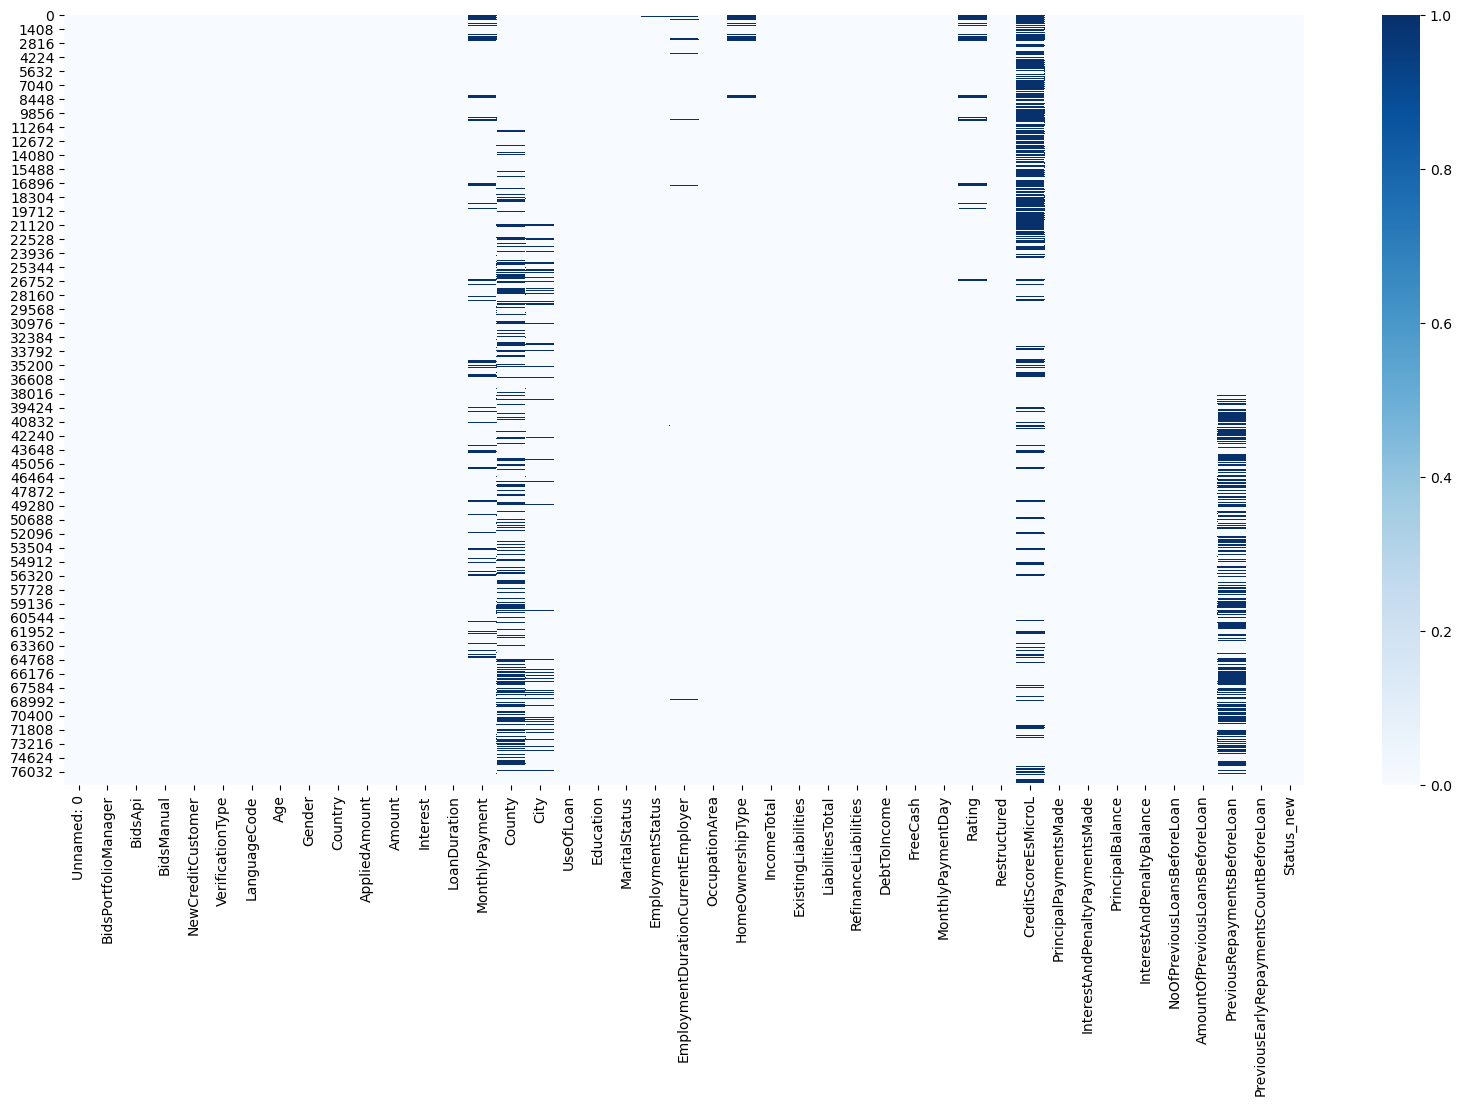

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='Blues');

As we know the Residency of the borrower(Country), we no more need unnecessary details like his division, city etc., Also there are many missing values here. We can't exactly predict the County and City of borrower. Hence County and City columns can be dropped.

In [5]:
df.drop(['County', 'CreditScoreEsMicroL'], axis=1, inplace=True)

In [6]:
numeric_columns = df.select_dtypes(include=['int','float']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
numeric_means = df[numeric_columns].mean()

In [7]:
df[numeric_columns] = df[numeric_columns].fillna(numeric_means)

In [8]:
df = df.fillna(df.mode().iloc[0])

In [9]:
df.isnull().sum()

Unnamed: 0                                0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType               

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              77394 non-null  int64  
 1   BidsPortfolioManager                    77394 non-null  int64  
 2   BidsApi                                 77394 non-null  int64  
 3   BidsManual                              77394 non-null  float64
 4   NewCreditCustomer                       77394 non-null  bool   
 5   VerificationType                        77394 non-null  object 
 6   LanguageCode                            77394 non-null  object 
 7   Age                                     77394 non-null  int64  
 8   Gender                                  77394 non-null  object 
 9   Country                                 77394 non-null  object 
 10  AppliedAmount                           77394 non-null  fl

Let's save this final preprocessed data into csv

In [11]:
df.to_csv('Bondora_preprocessed2.csv',index=False)

(77394, 41)

# Univartiate Analysis

In [12]:
num_col = [col for col in df if df[col].dtype in ['int64']] + [col for col in df if df[col].dtype in ['float64']]
cat_col = [col for col in df if df[col].dtype in ['object']]
bool_col = ['NewCreditCustomer','Restructured']

In [13]:
num_data=df.drop(cat_col, axis=1)
num_data=num_data.drop(bool_col, axis=1)

In [14]:
cat_data=df.select_dtypes(include=object)

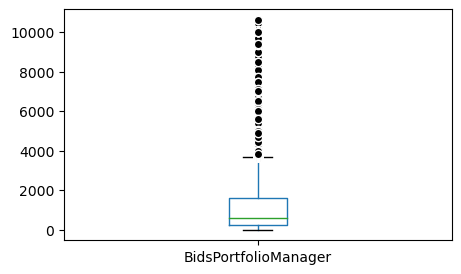

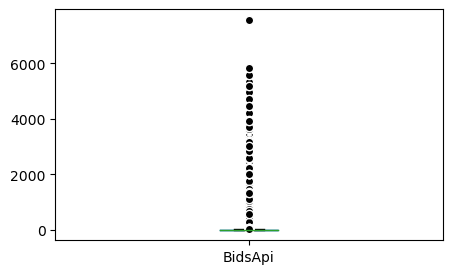

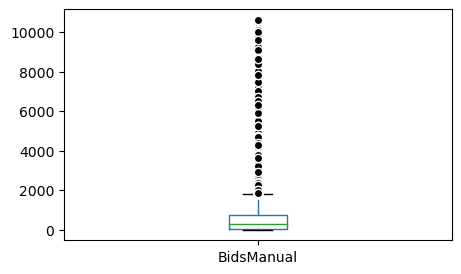

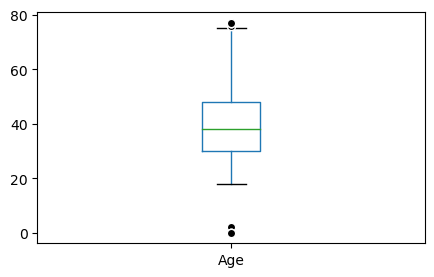

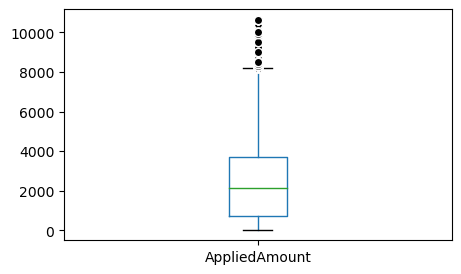

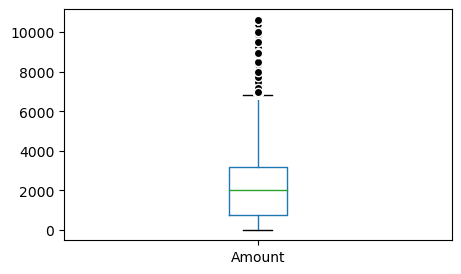

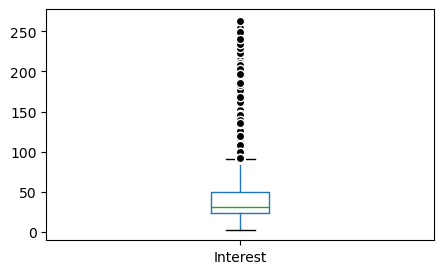

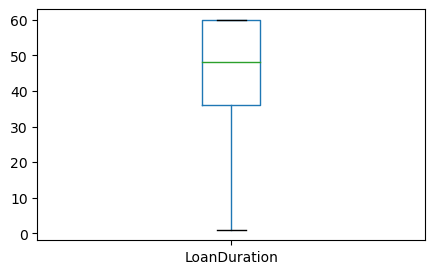

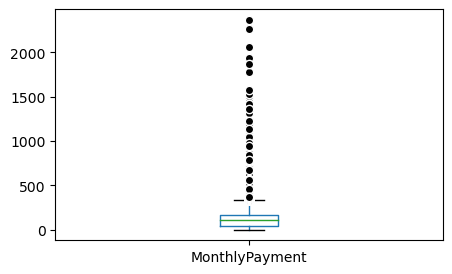

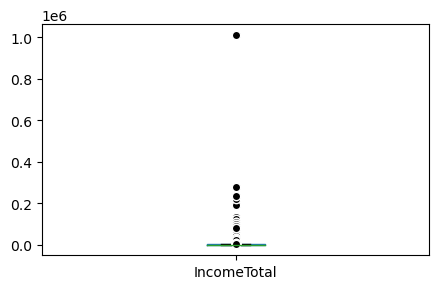

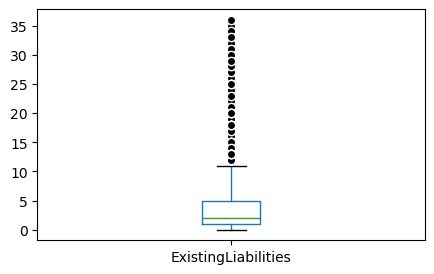

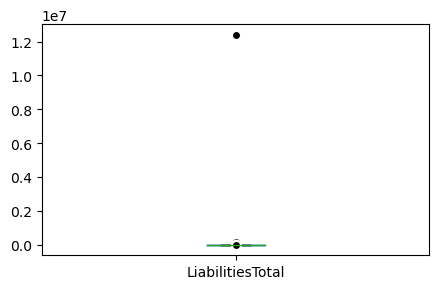

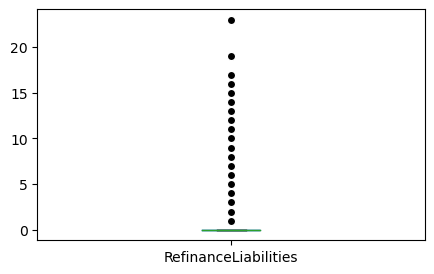

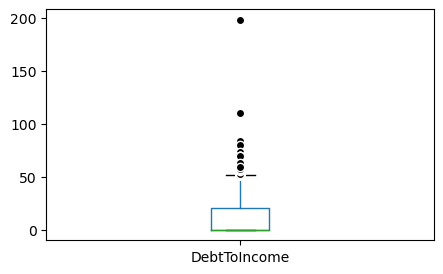

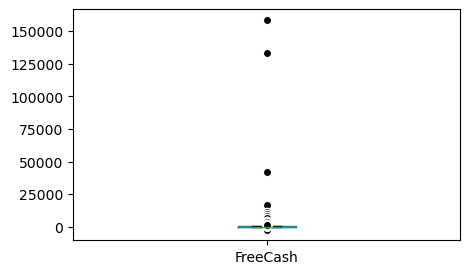

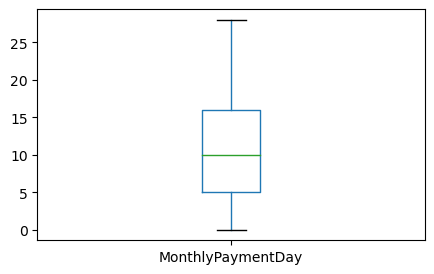

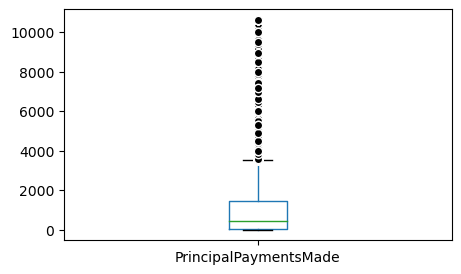

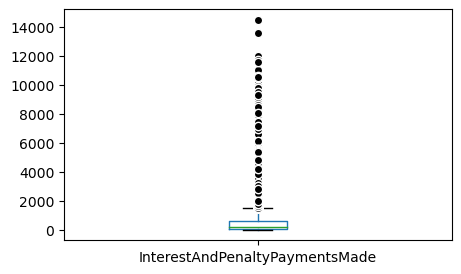

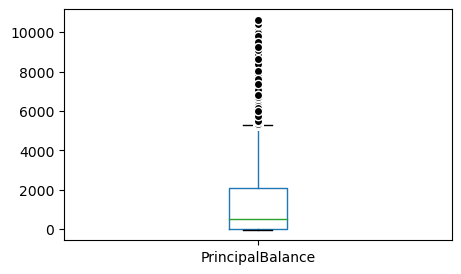

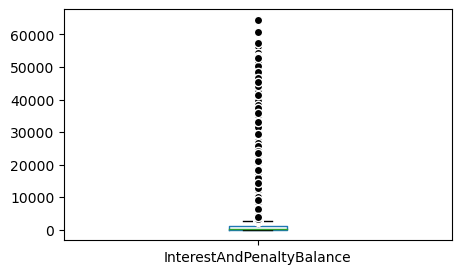

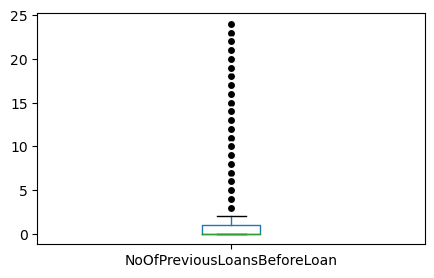

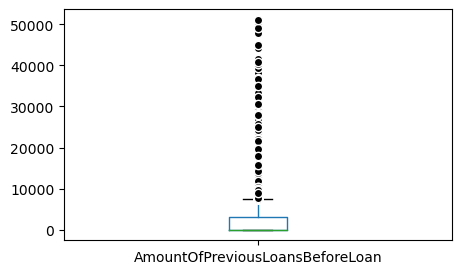

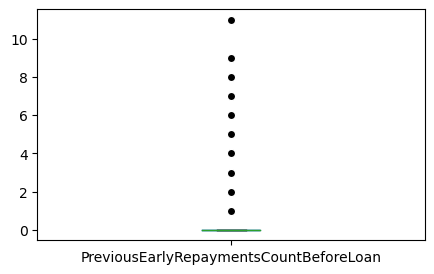

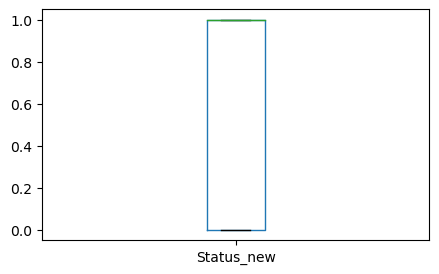

In [15]:
flierprops = dict(marker='o', markeredgecolor='white', markerfacecolor='black')
for column in num_data:
    plt.figure(figsize=(5,3))
    num_data.boxplot([column], grid=False, flierprops=flierprops)

We can see there are lot of outliers present where LoanDuration, MonethlyPaymentDay, Status_new are outlier free
There are very few outliers present in columns Age, LiabilitiesTotal

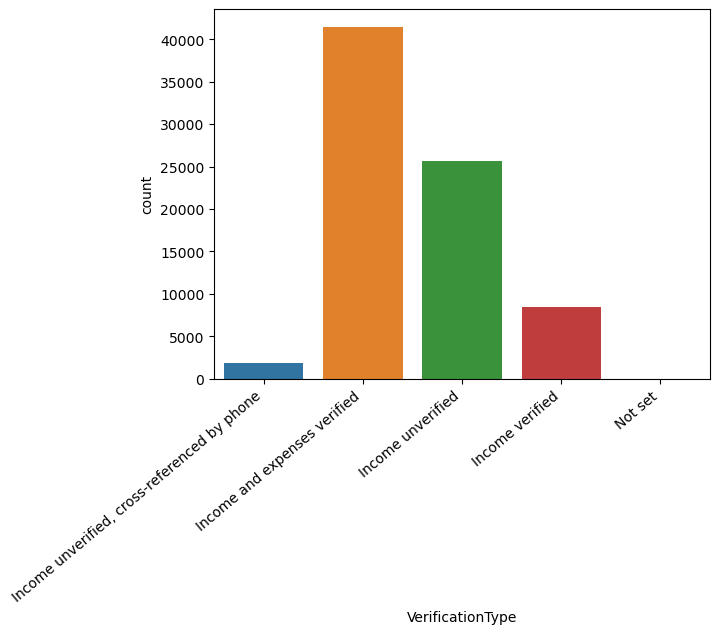

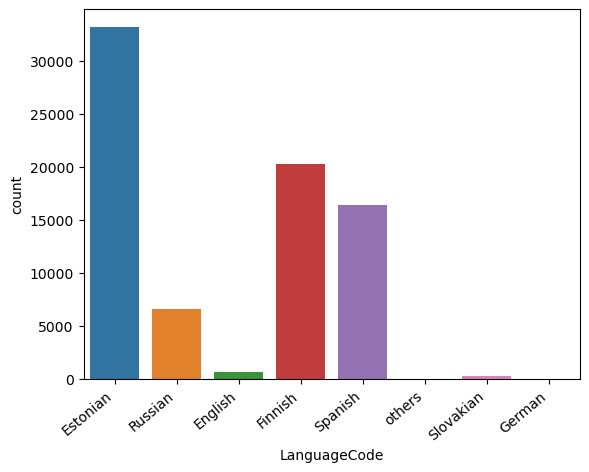

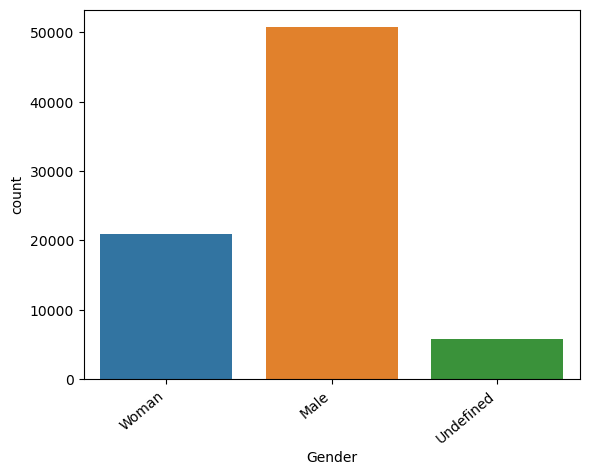

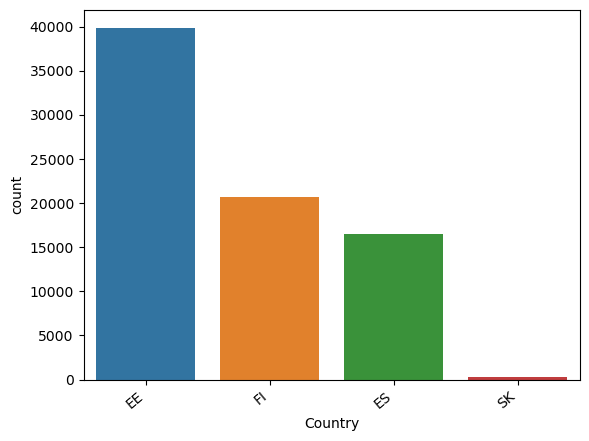

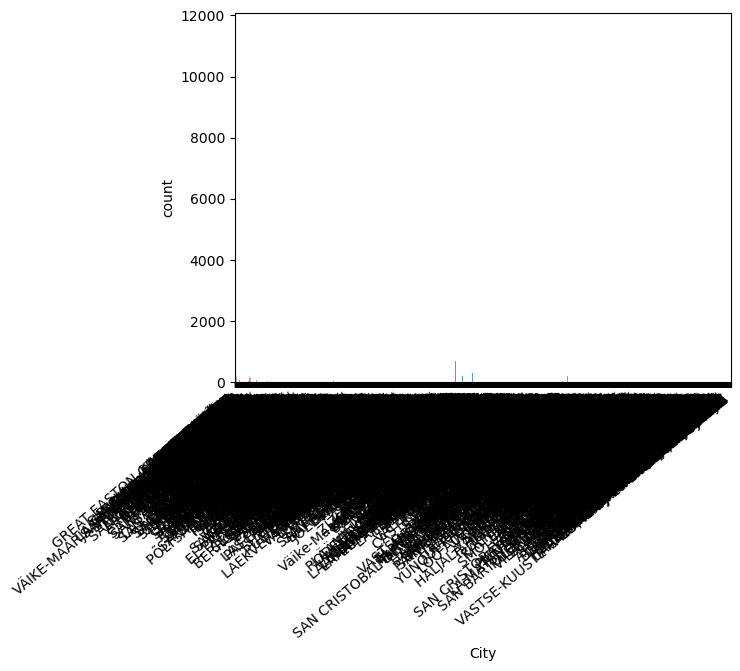

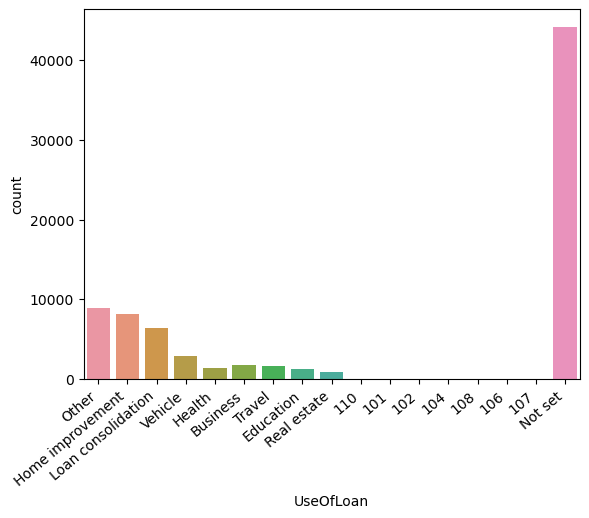

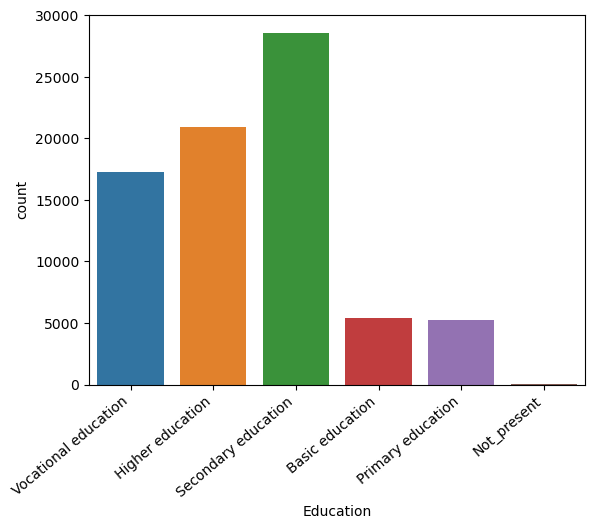

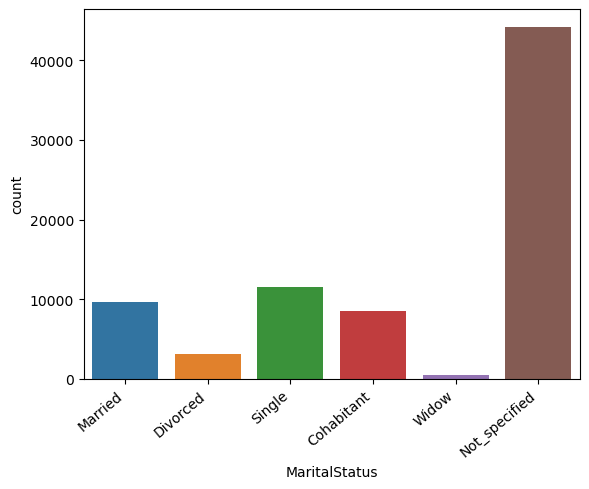

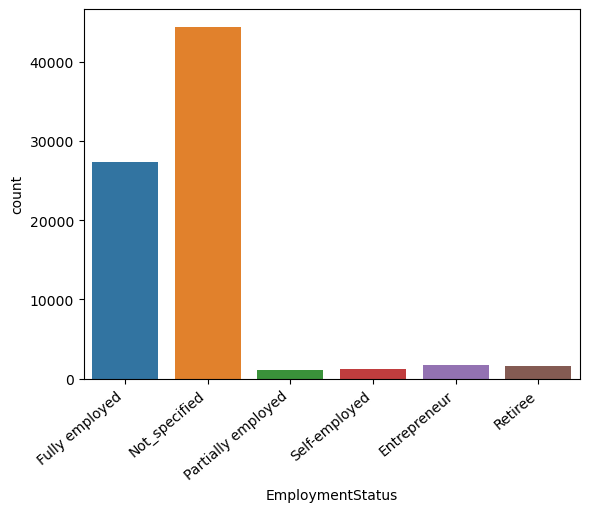

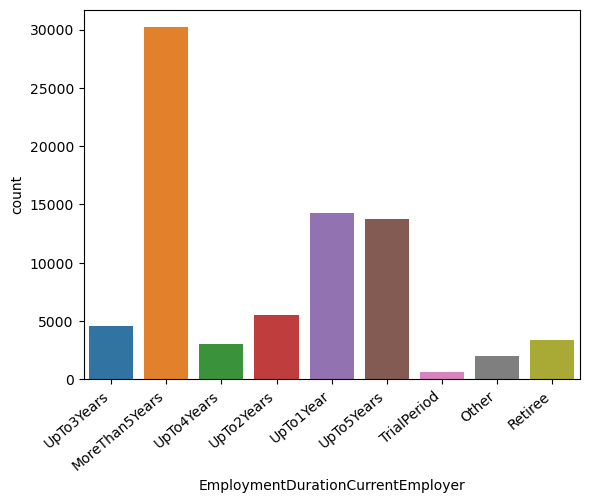

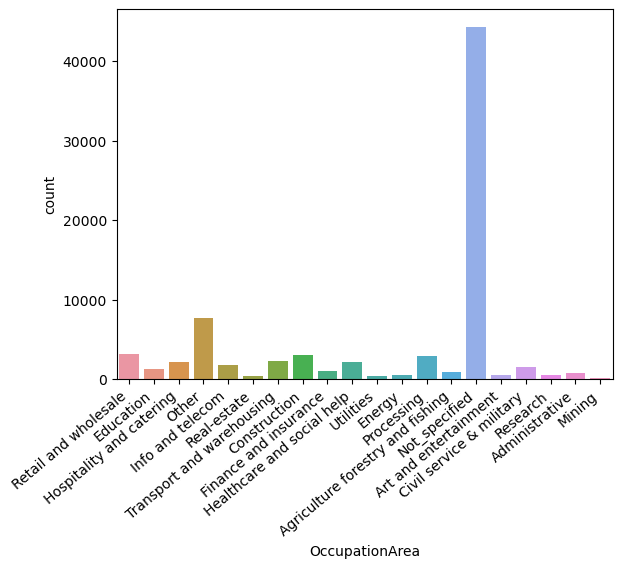

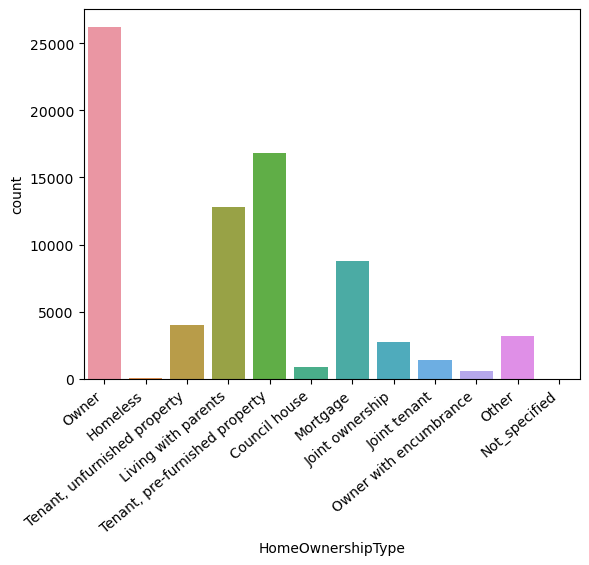

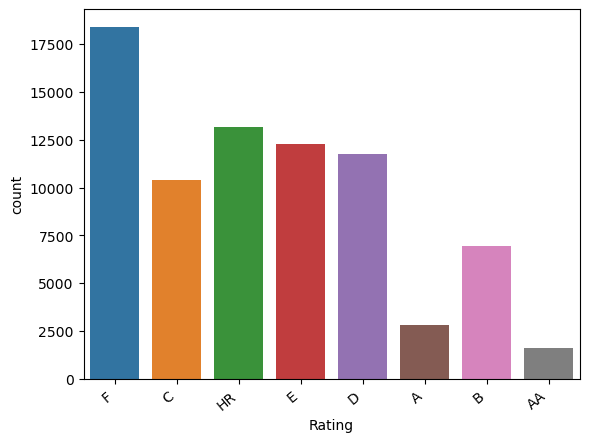

In [16]:
for col in cat_data:
    sns.countplot(cat_data[col])
    plt.xticks(rotation=40, horizontalalignment='right', fontsize=10)
    plt.show()

We can observe that there are some categorical columns with high not specified/set data
- UseOfLoan
- MaritalStatus
- EmploymentStatus
- OccupationArea

While HomeOwnershipType, Education and VerificationType have few Not set data and the remaining columns are completely defined

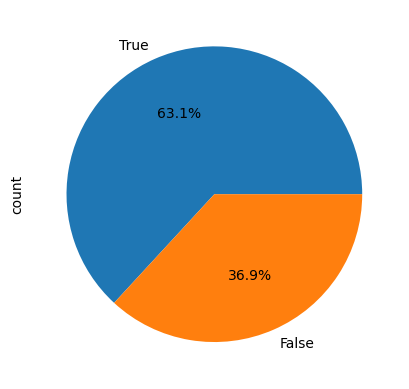

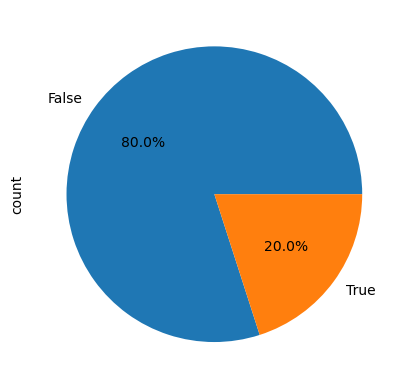

In [17]:
for col in bool_col:
    df[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show();

From the plot
- More than 63% customers have no prior credit history in Bondora
- The original maturity date has been increased by more than 60 days only for 20% of the loans

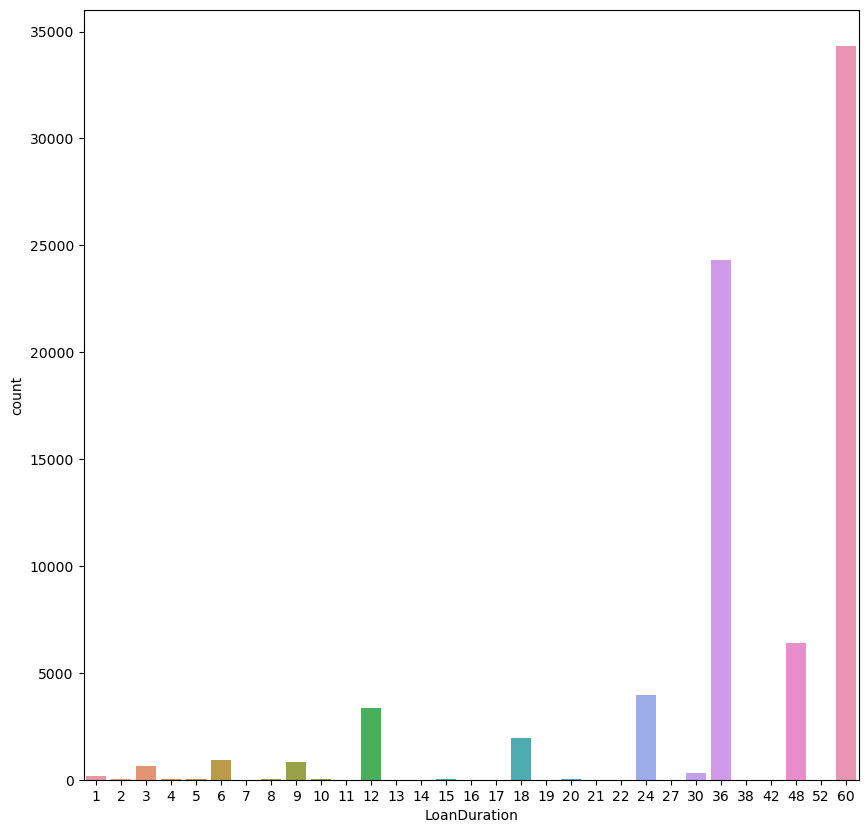

In [18]:
fig, ax=plt.subplots(figsize=(10,10))
sns.countplot(df['LoanDuration'], ax=ax)
plt.show()

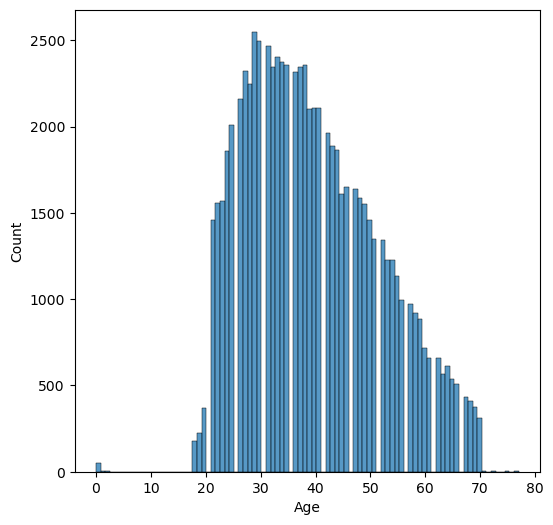

In [19]:
plt.figure(figsize=(6,6))
sns.histplot(df['Age']);

We can observe the most borrowers are of age around 25-40

Those borrowers of low age(0-2) might be outliers

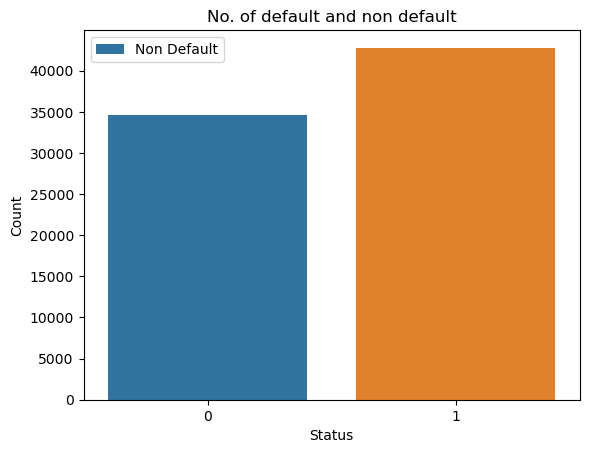

In [20]:
plt.figure()
sns.countplot(x='Status_new', data=df)
plt.title('No. of default and non default')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(['Non Default'])
plt.show()

# Bivariate Analysis

In [21]:
df['Status_new'].value_counts()

Status_new
1    42794
0    34600
Name: count, dtype: int64

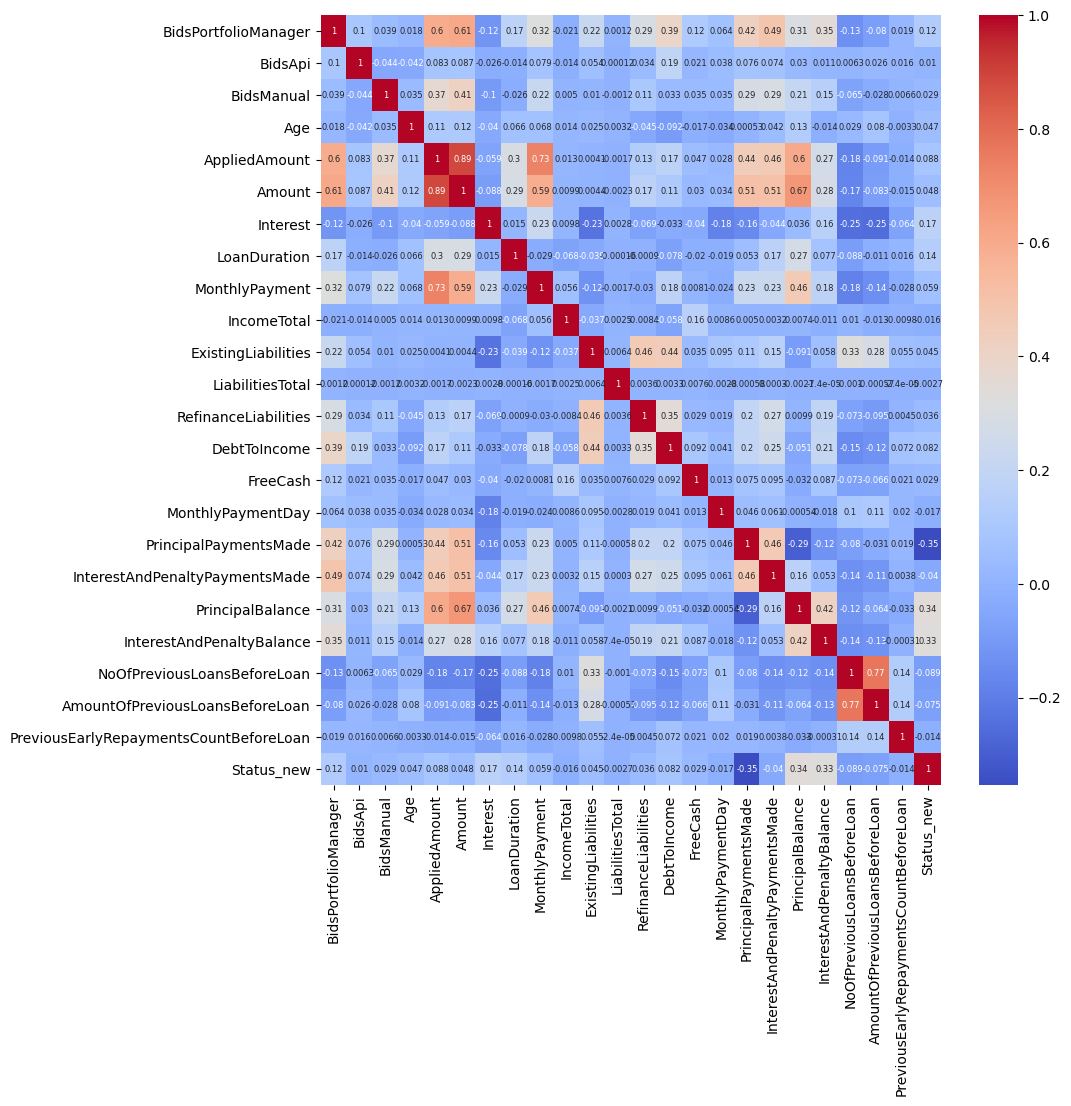

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(), annot=True,annot_kws={"size": 6},cmap='coolwarm');

Observations from correlation matrix:
- Target variable is highly negatively correlated with PrincipalPaymentsMade
- Target variable is positively correlated with InterestAndPenaltyBalance and PrincipalBalance

In [23]:
corr_matrix = num_data.corr()

In [24]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_pos_corr = [column for column in upper.columns if any(upper[column] > 0.5)]

In [25]:
high_pos_corr

['AppliedAmount',
 'Amount',
 'MonthlyPayment',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'AmountOfPreviousLoansBeforeLoan']

<AxesSubplot:>

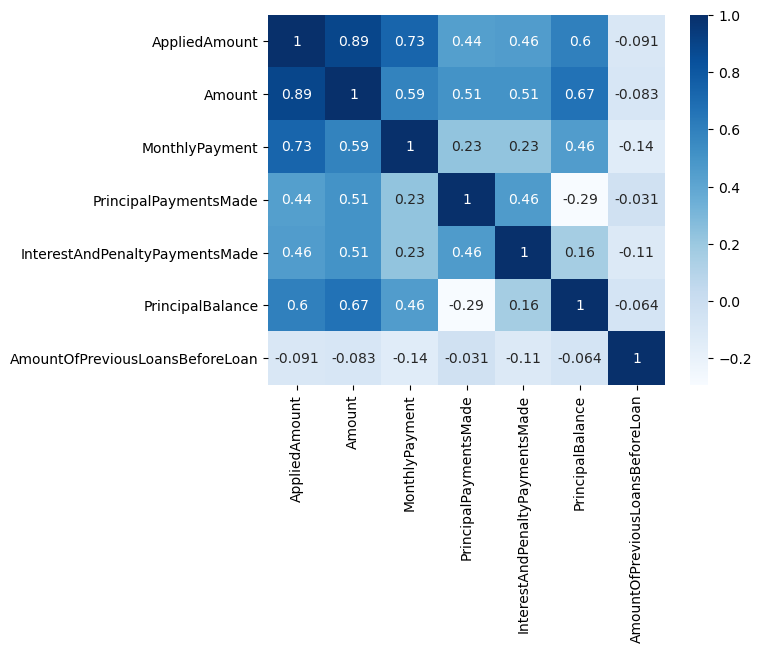

In [26]:
sns.heatmap(df[high_pos_corr].corr(), annot=True,cmap='Blues')

- AppiledAmount, Amount, MonthlyPayment, PrincipalBalance are highly correlated
- Amount, PrincipalPaymentsMade are highly correlated
- PreviousRepaymentsBeforeLoan is correlated with AmountOfPreviousLoansBeforeLoan

In [27]:
high_neg_corr = [column for column in upper.columns if any(upper[column] < -0.5)]

In [28]:
upper

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
BidsPortfolioManager,NaN,0.100354,0.038683,0.018176,0.597562,0.611067,-0.118746,0.172791,0.318258,-0.020684,0.217343,0.001181,0.289453,0.394098,0.120089,0.063698,0.423480,0.491630,0.305721,0.349070,-0.133753,-0.080246,0.018837,0.122154
BidsApi,NaN,NaN,-0.043737,-0.041827,0.083480,0.087201,-0.026198,-0.014436,0.079356,-0.013512,0.053673,0.000123,0.033556,0.187302,0.020789,0.037879,0.076033,0.073700,0.030368,0.010877,0.006260,0.025645,0.016336,0.010189
BidsManual,NaN,NaN,NaN,0.034868,0.368789,0.414369,-0.099817,-0.026149,0.218909,0.004997,0.010350,-0.001167,0.105129,0.032522,0.035256,0.035373,0.285131,0.286793,0.210582,0.152551,-0.064627,-0.027779,0.006572,0.029316
Age,NaN,NaN,NaN,NaN,0.108451,0.115197,-0.039835,0.065847,0.067565,0.013683,0.024595,0.003161,-0.045381,-0.091610,-0.016813,-0.034257,0.000527,0.042376,0.128580,-0.013684,0.028617,0.079883,-0.003338,0.047164
AppliedAmount,NaN,NaN,NaN,NaN,NaN,0.890612,-0.058711,0.295962,0.733004,0.012901,0.004062,-0.001740,0.132670,0.174226,0.046511,0.027530,0.442894,0.455388,0.603708,0.268875,-0.175454,-0.091219,-0.013590,0.088160
Amount,NaN,NaN,NaN,NaN,NaN,NaN,-0.088229,0.289665,0.590991,0.009901,0.004364,-0.002290,0.166372,0.112111,0.030231,0.034247,0.508962,0.506132,0.668613,0.277667,-0.172076,-0.083499,-0.015425,0.048411
Interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015011,0.227801,0.009824,-0.228342,0.002761,-0.069104,-0.033036,-0.039762,-0.183141,-0.155728,-0.044483,0.036034,0.157471,-0.245920,-0.253085,-0.063738,0.165912
LoanDuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028521,-0.068126,-0.038560,-0.000164,-0.000904,-0.078458,-0.019573,-0.019345,0.052966,0.167194,0.274160,0.077332,-0.088370,-0.010919,0.016002,0.141341
MonthlyPayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056068,-0.122454,-0.001739,-0.029715,0.177185,0.008145,-0.023883,0.231866,0.231847,0.455189,0.177775,-0.180039,-0.142286,-0.027516,0.059404
IncomeTotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037210,0.002544,-0.008396,-0.058051,0.159170,0.008615,0.004968,0.003183,0.007388,-0.010971,0.010312,-0.013277,-0.009802,-0.015941


In [29]:
high_neg_corr

[]

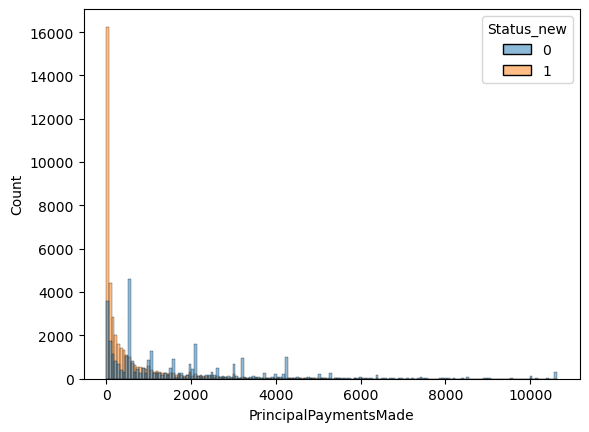

In [30]:
sns.histplot(x='PrincipalPaymentsMade', hue='Status_new', data=df);

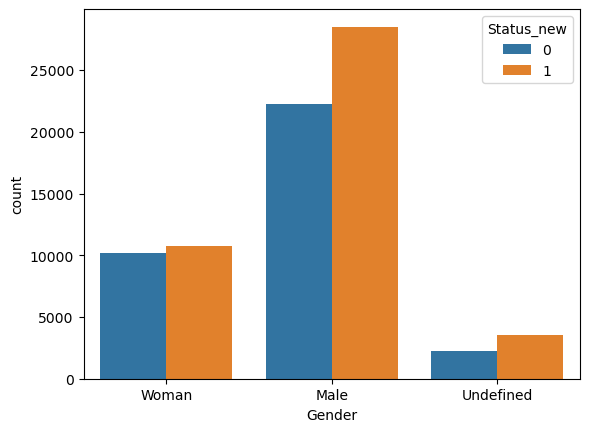

In [31]:
sns.countplot('Gender', hue='Status_new', data=df);

We can observe defaulted loans are high irrespective of gender

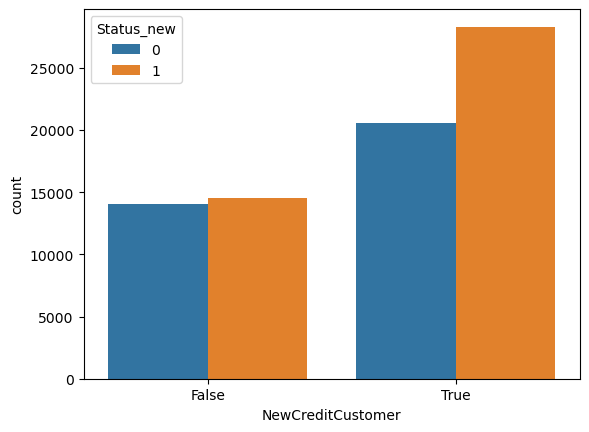

In [32]:
sns.countplot('NewCreditCustomer', hue='Status_new', data=df);

Defaulted loans of the cutomers with no prior history in Bondora are high and Status of default and non default loans are almost equal for customers with prior credit history in Bondora

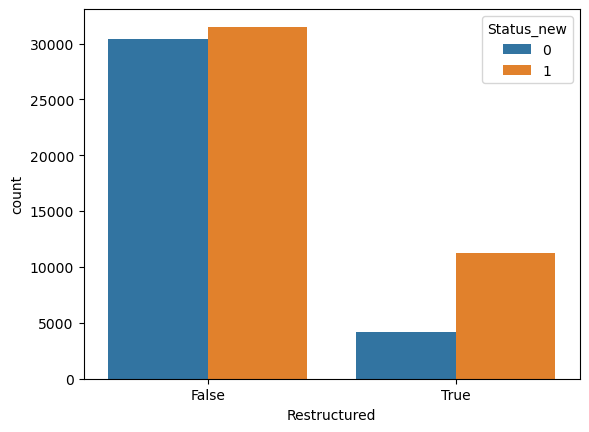

In [33]:
sns.countplot('Restructured', hue='Status_new', data=df);

We can't interpret much from this

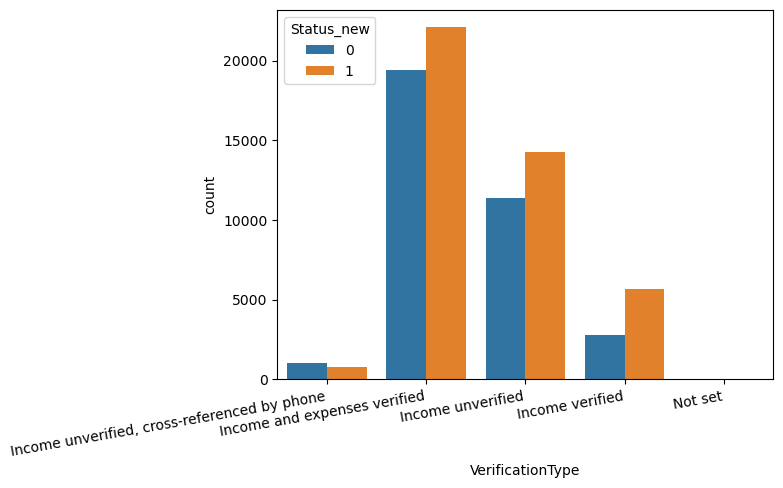

In [34]:
sns.countplot('VerificationType', hue='Status_new', data=df)
plt.xticks(rotation=10, horizontalalignment='right', fontsize=10);

In [35]:
cat_col

['VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating']

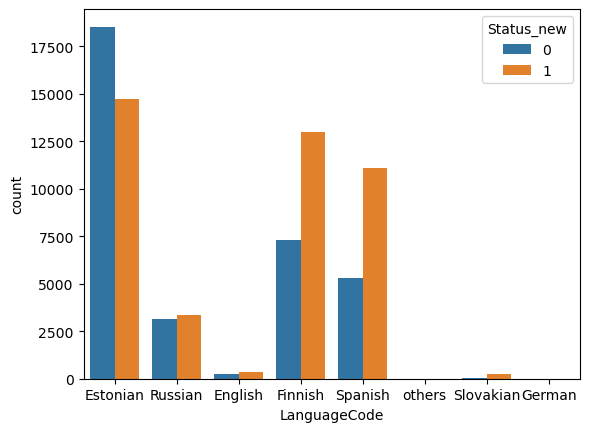

In [36]:
sns.countplot('LanguageCode',hue='Status_new', data=df);

Defaulted loans of Estonians are less than Non defaulted loans. While all others have Default loans high 

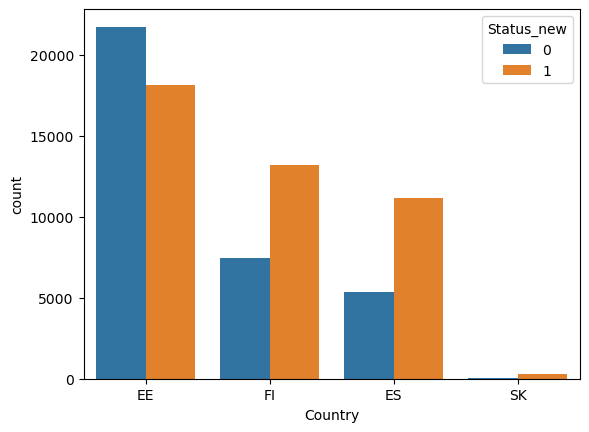

In [37]:
sns.countplot('Country',hue='Status_new',data=df);